In [1]:
import pandas as pd
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report, balanced_accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split, StratifiedKFold, cross_val_score
from scipy.stats import randint
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import TomekLinks, CondensedNearestNeighbour, NearMiss
import matplotlib.pyplot as plt

In [3]:
# pobranie zbioru danych
dane_warminskie = pd.read_csv('warminskie_dane_do_analizy.csv', sep=';')

# ograniczenie zbioru danych do miejscowości niesamodzielnych
zbior_niesamodzielny = (
    dane_warminskie)[dane_warminskie['czy_samodzielna'] == False]
na = zbior_niesamodzielny[zbior_niesamodzielny.isnull().any(axis=1)]
na

,SIMC_id,rodzaj,nazwa,czy_samodzielna,liczba_adresow,liczba_mieszkancow,powierzchnia,zageszczenie_ludnosci,liczba_budynkow,powierzchnia_budynkow,...,budynkiODwochMieszkaniach,budynkiOTrzechIWiecejMieszkaniach,budynkiPrzemyslowe,budynkiSzkolIInstytucjiBadawczych,budynkiSzpitaliIZakladowOpiekiMedycznej,budynkiZakwaterowaniaTurystycznegoPozostale,budynkiZbiorowegoZamieszkania,ogolnodostepneObiektyKulturalne,pozostaleBudynkiNiemieszkalne,zbiornikSilosIBudynkiMagazynowe
4,149647,część wsi,Adamowo-Osiedle,False,26,88,264581.60,0.033260,29.0,7311.39,...,2.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
695,469659,część wsi,Glinka,False,1,3,55061.74,0.005448,2.0,511.37,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1313,478760,przysiółek wsi,Kowalewo Małe,False,2,6,532353.50,0.001127,2.0,368.82,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1712,486936,przysiółek wsi,Mała Bertynówka,False,1,1,84211.37,0.001187,4.0,400.14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2085,477653,przysiółek osady,Olchowo,False,1,5,761698.18,0.000656,3.0,962.71,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2242,469702,przysiółek wsi,Pieszewo,False,3,4,203091.70,0.001970,9.0,1449.83,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2318,478718,przysiółek wsi,Podgórzyn,False,2,3,464157.64,0.000646,8.0,667.77,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2541,469613,przysiółek wsi,Rowy,False,3,13,445021.01,0.002921,8.0,1024.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2614,488496,część wsi,Rybakowo,False,6,9,225982.76,0.003983,13.0,2184.66,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2652,469079,przysiółek wsi,Rzymek,False,5,10,583355.00,0.001714,20.0,3238.97,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
dane_warminskie = pd.read_csv('28/warminskie_miejscowosci_do_analizy_v2.csv', sep=';')
dane_warminskie

,SIMC_id,rodzaj,nazwa,czy_samodzielna,liczba_adresow,liczba_mieszkancow,powierzchnia,liczba_budynkow,powierzchnia_budynkow,srednia_liczba_kondygnacji,...,nna_index,srednia_odleglosci,odchylenie_standardowe,wspolczynnik_zmiennosci,min_odleglosc,max_odleglosc,min_max_rozstep,dlugosc_drog,powierzchnia_terenow_uprawnych,powierzchnia_terenow_zalesionych
0,149222,wieś,Adamowo,True,21,65,5184091.39,60.0,14715.06,1.300000,...,0.287704,1223.486507,853.187516,69.734117,6.805516,3049.927024,3049.927024,15714.60,32101261.06,139241.58
1,157948,wieś,Adamowo,True,69,255,4841070.89,147.0,25168.40,1.408163,...,0.345539,1211.098579,648.750812,53.567135,7.723816,3010.174003,3010.174003,22394.61,32340402.95,2060690.32
2,117890,wieś,Adamowo,True,33,83,2073808.18,93.0,8551.89,1.505376,...,0.232380,203.093999,156.541945,77.078568,5.140856,888.593759,888.593759,6936.66,13050833.55,926673.01
3,471403,wieś,Adamowo,True,13,142,12131404.50,118.0,32306.85,1.101695,...,0.160716,1239.796179,725.923757,58.551863,6.414879,3130.001913,3130.001913,47810.99,16201419.47,9013457.10
4,149647,część wsi,Adamowo-Osiedle,False,26,88,264581.60,29.0,7311.39,1.448276,...,0.454862,132.621878,79.351370,59.832790,5.648417,402.083649,402.083649,5244.73,31493223.74,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3758,1044100,osada,Rozdroże,True,76,429,944005.19,88.0,17862.33,1.409091,...,0.570609,397.641182,221.024272,55.583848,6.201421,1074.914468,1074.914468,5997.42,56509298.63,111774.63
3759,1047050,osada,Janowo,True,2,5,4442946.03,21.0,1600.72,1.285714,...,0.358676,1158.103589,1044.314695,90.174550,7.218277,2380.240443,2380.240443,20821.40,3788940.15,7144659.80
3760,764660,kolonia,Wąglik-Kolonia,True,6,7,24333.51,7.0,883.66,1.000000,...,1.081121,59.375132,34.049685,57.346710,24.023513,112.380274,112.380274,976.64,531362.10,12336688.10
3761,770672,kolonia,Zajdy,True,5,12,704732.13,20.0,2580.28,1.000000,...,0.165141,505.469867,361.880396,71.592872,7.672812,1110.875269,1110.875269,3008.37,6337753.61,913189.20


In [7]:
dane_warminskie = pd.read_csv('warminskie_dane_do_analizy.csv', sep=';')
dane_warminskie = dane_warminskie.iloc[:, :25]
na = dane_warminskie[dane_warminskie.isnull().any(axis=1)]
na

,SIMC_id,rodzaj,nazwa,czy_samodzielna,liczba_adresow,liczba_mieszkancow,powierzchnia,zageszczenie_ludnosci,liczba_budynkow,powierzchnia_budynkow,...,wspolczynnik_zmiennosci,min_odleglosc,max_odleglosc,min_max_rozstep,powierzchnia_terenow_uprawnych,powierzchnia_terenow_zalesionych,stosunek_powierzchni_upraw,stosunek_powierzchni_lasow,budynekGospodarstwaRolnego,budynekZabytkowy
4,149647,część wsi,Adamowo-Osiedle,False,26,88,264581.60,0.033260,29.0,7311.39,...,59.832790,5.648417,402.083649,402.083649,3.149322e+07,NaN,NaN,NaN,4.0,0.0
41,488289,osada,Bajorki,True,1,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161,150521,wieś,Błotnica,True,19,79,4555786.24,0.001734,48.0,5370.14,...,68.690602,6.400246,2960.250771,2960.250771,3.197679e+07,NaN,NaN,NaN,30.0,0.0
246,152098,wieś,Brudzędy,True,37,170,3902680.21,0.004356,110.0,15641.76,...,67.772760,6.075752,2942.832101,2942.832101,2.221072e+07,NaN,NaN,NaN,67.0,0.0
306,479385,osada,Cebulki,True,19,170,825858.88,0.020585,63.0,14224.80,...,63.128466,5.624925,514.972404,514.972404,3.815138e+07,NaN,NaN,NaN,30.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3752,485032,część wsi,Idzbarski Młyn,False,4,6,95564.95,0.006278,11.0,1277.94,...,72.805050,11.928814,333.394768,333.394768,3.448269e+06,NaN,NaN,NaN,7.0,0.0
3758,473260,osada leśna,Rów,True,6,4,11694.58,0.034204,9.0,546.57,...,58.820325,4.218236,79.451610,79.451610,NaN,NaN,NaN,NaN,NaN,NaN
3769,1056020,część wsi,Stare Jegławki,False,2,8,87048.35,0.009190,2.0,284.72,...,100.000000,22.621115,22.621115,22.621115,1.268367e+08,NaN,NaN,NaN,1.0,0.0
3770,1061630,osada,Parkity,True,1,1,2194465.41,0.000046,NaN,NaN,...,NaN,NaN,NaN,NaN,3.964247e+07,4300223.36,18.064749,1.959577,NaN,NaN


In [136]:
# dane_warminskie_do_analizy = dane_warminskie.drop(['SIMC_id', 'nazwa'], axis=1)
#                                                    'budynkiODwochMieszkaniach', 
#                                                    'budynkiOTrzechIWiecejMieszkaniach', 
#                                                    'budynkiPrzemyslowe', 
#                                                    'budynkiSzkolIInstytucjiBadawczych', 
#                                                    'budynekZabytkowy', 'budynkiBiurowe', 
#                                                    'budynkiGarazy', 'budynkiHandlowoUslugowe', 
#                                                    'budynkiHoteli', 'budynkiKultuReligijnego', 
#                                                    'budynkiKulturyFizycznej', 
#                                                    'budynkiLacznosciDworcowITerminali', 
#                                                    'budynkiMuzeowIBibliotek', 
#                                                    'budynkiSzpitaliIZakladowOpiekiMedycznej',
#                                                    'budynkiZakwaterowaniaTurystycznegoPozostale',
#                                                    'budynkiZbiorowegoZamieszkania', 
#                                                    'ogolnodostepneObiektyKulturalne',
#                                                    'pozostaleBudynkiNiemieszkalne', 
#                                                    'zbiornikSilosIBudynkiMagazynowe', 
#                                                    'dlugosc_drog'])
dane_warminskie_do_analizy = dane_warminskie

In [137]:
dane_warminskie_do_analizy['zageszczenie_ludnosci'] = dane_warminskie_do_analizy['liczba_mieszkancow']/dane_warminskie_do_analizy['powierzchnia']
dane_warminskie_do_analizy['gestosc_zabudowy'] = (
        dane_warminskie_do_analizy['powierzchnia_budynkow']/dane_warminskie_do_analizy['powierzchnia'])
dane_warminskie_do_analizy['stosunek_powierzchni_upraw'] = dane_warminskie_do_analizy['powierzchnia_terenow_uprawnych']/dane_warminskie_do_analizy['powierzchnia']
# dane_warminskie_do_analizy = dane_warminskie_do_analizy.drop(['powierzchnia', 'liczba_mieszkancow', 'liczba_budynkow', 'powierzchnia_budynkow', 'powierzchnia_terenow_uprawnych'], axis=1)
# dane_warminskie_do_analizy = dane_warminskie_do_analizy.drop('wspolczynnik_zmiennosci', axis=1)

In [138]:
dane_warminskie_do_analizy

,SIMC_id,rodzaj,nazwa,czy_samodzielna,liczba_adresow,liczba_mieszkancow,powierzchnia,liczba_budynkow,powierzchnia_budynkow,srednia_liczba_kondygnacji,...,wspolczynnik_zmiennosci,min_odleglosc,max_odleglosc,min_max_rozstep,dlugosc_drog,powierzchnia_terenow_uprawnych,powierzchnia_terenow_zalesionych,zageszczenie_ludnosci,gestosc_zabudowy,stosunek_powierzchni_upraw
0,149222,wieś,Adamowo,True,21,65,5184091.39,60.0,14715.06,1.300000,...,69.734117,6.805516,3049.927024,3049.927024,15714.60,32101261.06,139241.58,0.000013,0.002839,6.192264
1,157948,wieś,Adamowo,True,69,255,4841070.89,147.0,25168.40,1.408163,...,53.567135,7.723816,3010.174003,3010.174003,22394.61,32340402.95,2060690.32,0.000053,0.005199,6.680423
2,117890,wieś,Adamowo,True,33,83,2073808.18,93.0,8551.89,1.505376,...,77.078568,5.140856,888.593759,888.593759,6936.66,13050833.55,926673.01,0.000040,0.004124,6.293173
3,471403,wieś,Adamowo,True,13,142,12131404.50,118.0,32306.85,1.101695,...,58.551863,6.414879,3130.001913,3130.001913,47810.99,16201419.47,9013457.10,0.000012,0.002663,1.335494
4,149647,część wsi,Adamowo-Osiedle,False,26,88,264581.60,29.0,7311.39,1.448276,...,59.832790,5.648417,402.083649,402.083649,5244.73,31493223.74,0.00,0.000333,0.027634,119.030287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3758,1044100,osada,Rozdroże,True,76,429,944005.19,88.0,17862.33,1.409091,...,55.583848,6.201421,1074.914468,1074.914468,5997.42,56509298.63,111774.63,0.000454,0.018922,59.861216
3759,1047050,osada,Janowo,True,2,5,4442946.03,21.0,1600.72,1.285714,...,90.174550,7.218277,2380.240443,2380.240443,20821.40,3788940.15,7144659.80,0.000001,0.000360,0.852799
3760,764660,kolonia,Wąglik-Kolonia,True,6,7,24333.51,7.0,883.66,1.000000,...,57.346710,24.023513,112.380274,112.380274,976.64,531362.10,12336688.10,0.000288,0.036315,21.836640
3761,770672,kolonia,Zajdy,True,5,12,704732.13,20.0,2580.28,1.000000,...,71.592872,7.672812,1110.875269,1110.875269,3008.37,6337753.61,913189.20,0.000017,0.003661,8.993138


In [100]:
# ane_warminskie_do_analizy.columns.to_list()

In [101]:
zbior_samodzielny = dane_warminskie_do_analizy[dane_warminskie_do_analizy['czy_samodzielna'] == True]
zbior_niesamodzielny = dane_warminskie_do_analizy[dane_warminskie_do_analizy['czy_samodzielna'] == False]

In [102]:
zbior_samodzielny = zbior_samodzielny[zbior_samodzielny['rodzaj'].isin({'wieś', 'osada', 'osada leśna', 'kolonia'})]

In [103]:
zbior_samodzielny

,rodzaj,czy_samodzielna,liczba_adresow,liczba_mieszkancow,powierzchnia,liczba_budynkow,powierzchnia_budynkow,srednia_liczba_kondygnacji,budynekGospodarstwaRolnego,budynekZabytkowy,...,min_odleglosc,max_odleglosc,min_max_rozstep,dlugosc_drog,powierzchnia_terenow_uprawnych,powierzchnia_terenow_zalesionych,zageszczenie_ludnosci,stosunek_powierzchni_zabudowy,powierzchnia_dla_budynku,stosunek_powierzchni_upraw
0,wieś,True,21,65,5184091.39,60.0,14715.06,1.300000,37.0,0.0,...,6.805516,3049.927024,3049.927024,15714.60,32101261.06,139241.58,0.000013,0.002839,86401.523167,6.192264
1,wieś,True,69,255,4841070.89,147.0,25168.40,1.408163,77.0,0.0,...,7.723816,3010.174003,3010.174003,22394.61,32340402.95,2060690.32,0.000053,0.005199,32932.455034,6.680423
2,wieś,True,33,83,2073808.18,93.0,8551.89,1.505376,61.0,0.0,...,5.140856,888.593759,888.593759,6936.66,13050833.55,926673.01,0.000040,0.004124,22299.012688,6.293173
3,wieś,True,13,142,12131404.50,118.0,32306.85,1.101695,77.0,0.0,...,6.414879,3130.001913,3130.001913,47810.99,16201419.47,9013457.10,0.000012,0.002663,102808.512712,1.335494
5,osada,True,5,13,336859.70,11.0,1504.12,1.000000,7.0,0.0,...,8.621111,144.899467,144.899467,1313.33,9517949.15,45531.33,0.000039,0.004465,30623.609091,28.254936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3758,osada,True,76,429,944005.19,88.0,17862.33,1.409091,51.0,0.0,...,6.201421,1074.914468,1074.914468,5997.42,56509298.63,111774.63,0.000454,0.018922,10727.331705,59.861216
3759,osada,True,2,5,4442946.03,21.0,1600.72,1.285714,5.0,0.0,...,7.218277,2380.240443,2380.240443,20821.40,3788940.15,7144659.80,0.000001,0.000360,211568.858571,0.852799
3760,kolonia,True,6,7,24333.51,7.0,883.66,1.000000,1.0,0.0,...,24.023513,112.380274,112.380274,976.64,531362.10,12336688.10,0.000288,0.036315,3476.215714,21.836640
3761,kolonia,True,5,12,704732.13,20.0,2580.28,1.000000,16.0,0.0,...,7.672812,1110.875269,1110.875269,3008.37,6337753.61,913189.20,0.000017,0.003661,35236.606500,8.993138


In [104]:
zbior_samodzielny['rodzaj'].value_counts()

rodzaj
wieś           2385
osada           955
osada leśna     103
kolonia          86
Name: count, dtype: int64

In [105]:
zbior_samodzielny = zbior_samodzielny.drop('czy_samodzielna', axis=1)
zbior_samodzielny

,rodzaj,liczba_adresow,liczba_mieszkancow,powierzchnia,liczba_budynkow,powierzchnia_budynkow,srednia_liczba_kondygnacji,budynekGospodarstwaRolnego,budynekZabytkowy,budynkiBiurowe,...,min_odleglosc,max_odleglosc,min_max_rozstep,dlugosc_drog,powierzchnia_terenow_uprawnych,powierzchnia_terenow_zalesionych,zageszczenie_ludnosci,stosunek_powierzchni_zabudowy,powierzchnia_dla_budynku,stosunek_powierzchni_upraw
0,wieś,21,65,5184091.39,60.0,14715.06,1.300000,37.0,0.0,0.0,...,6.805516,3049.927024,3049.927024,15714.60,32101261.06,139241.58,0.000013,0.002839,86401.523167,6.192264
1,wieś,69,255,4841070.89,147.0,25168.40,1.408163,77.0,0.0,0.0,...,7.723816,3010.174003,3010.174003,22394.61,32340402.95,2060690.32,0.000053,0.005199,32932.455034,6.680423
2,wieś,33,83,2073808.18,93.0,8551.89,1.505376,61.0,0.0,0.0,...,5.140856,888.593759,888.593759,6936.66,13050833.55,926673.01,0.000040,0.004124,22299.012688,6.293173
3,wieś,13,142,12131404.50,118.0,32306.85,1.101695,77.0,0.0,0.0,...,6.414879,3130.001913,3130.001913,47810.99,16201419.47,9013457.10,0.000012,0.002663,102808.512712,1.335494
5,osada,5,13,336859.70,11.0,1504.12,1.000000,7.0,0.0,0.0,...,8.621111,144.899467,144.899467,1313.33,9517949.15,45531.33,0.000039,0.004465,30623.609091,28.254936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3758,osada,76,429,944005.19,88.0,17862.33,1.409091,51.0,0.0,0.0,...,6.201421,1074.914468,1074.914468,5997.42,56509298.63,111774.63,0.000454,0.018922,10727.331705,59.861216
3759,osada,2,5,4442946.03,21.0,1600.72,1.285714,5.0,0.0,0.0,...,7.218277,2380.240443,2380.240443,20821.40,3788940.15,7144659.80,0.000001,0.000360,211568.858571,0.852799
3760,kolonia,6,7,24333.51,7.0,883.66,1.000000,1.0,0.0,0.0,...,24.023513,112.380274,112.380274,976.64,531362.10,12336688.10,0.000288,0.036315,3476.215714,21.836640
3761,kolonia,5,12,704732.13,20.0,2580.28,1.000000,16.0,0.0,0.0,...,7.672812,1110.875269,1110.875269,3008.37,6337753.61,913189.20,0.000017,0.003661,35236.606500,8.993138


In [106]:
pd.DataFrame(zbior_samodzielny.columns)

,0
0,rodzaj
1,liczba_adresow
2,liczba_mieszkancow
3,powierzchnia
4,liczba_budynkow
5,powierzchnia_budynkow
6,srednia_liczba_kondygnacji
7,budynekGospodarstwaRolnego
8,budynekZabytkowy
9,budynkiBiurowe


In [107]:
mapowanie = \
    {'wieś': 0, 
     'osada': 1, 
     'osada leśna': 2, 
     'kolonia': 3 }
     # 'przysiółek': 4 }
zbior_samodzielny['rodzaj'] = zbior_samodzielny['rodzaj'].map(mapowanie)
zbior_samodzielny

,rodzaj,liczba_adresow,liczba_mieszkancow,powierzchnia,liczba_budynkow,powierzchnia_budynkow,srednia_liczba_kondygnacji,budynekGospodarstwaRolnego,budynekZabytkowy,budynkiBiurowe,...,min_odleglosc,max_odleglosc,min_max_rozstep,dlugosc_drog,powierzchnia_terenow_uprawnych,powierzchnia_terenow_zalesionych,zageszczenie_ludnosci,stosunek_powierzchni_zabudowy,powierzchnia_dla_budynku,stosunek_powierzchni_upraw
0,0,21,65,5184091.39,60.0,14715.06,1.300000,37.0,0.0,0.0,...,6.805516,3049.927024,3049.927024,15714.60,32101261.06,139241.58,0.000013,0.002839,86401.523167,6.192264
1,0,69,255,4841070.89,147.0,25168.40,1.408163,77.0,0.0,0.0,...,7.723816,3010.174003,3010.174003,22394.61,32340402.95,2060690.32,0.000053,0.005199,32932.455034,6.680423
2,0,33,83,2073808.18,93.0,8551.89,1.505376,61.0,0.0,0.0,...,5.140856,888.593759,888.593759,6936.66,13050833.55,926673.01,0.000040,0.004124,22299.012688,6.293173
3,0,13,142,12131404.50,118.0,32306.85,1.101695,77.0,0.0,0.0,...,6.414879,3130.001913,3130.001913,47810.99,16201419.47,9013457.10,0.000012,0.002663,102808.512712,1.335494
5,1,5,13,336859.70,11.0,1504.12,1.000000,7.0,0.0,0.0,...,8.621111,144.899467,144.899467,1313.33,9517949.15,45531.33,0.000039,0.004465,30623.609091,28.254936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3758,1,76,429,944005.19,88.0,17862.33,1.409091,51.0,0.0,0.0,...,6.201421,1074.914468,1074.914468,5997.42,56509298.63,111774.63,0.000454,0.018922,10727.331705,59.861216
3759,1,2,5,4442946.03,21.0,1600.72,1.285714,5.0,0.0,0.0,...,7.218277,2380.240443,2380.240443,20821.40,3788940.15,7144659.80,0.000001,0.000360,211568.858571,0.852799
3760,3,6,7,24333.51,7.0,883.66,1.000000,1.0,0.0,0.0,...,24.023513,112.380274,112.380274,976.64,531362.10,12336688.10,0.000288,0.036315,3476.215714,21.836640
3761,3,5,12,704732.13,20.0,2580.28,1.000000,16.0,0.0,0.0,...,7.672812,1110.875269,1110.875269,3008.37,6337753.61,913189.20,0.000017,0.003661,35236.606500,8.993138


In [108]:
X = zbior_samodzielny.drop('rodzaj', axis=1)
y = zbior_samodzielny['rodzaj'].values

In [109]:
# scaler = RobustScaler()
# scaler = StandardScaler()
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [110]:
zbior_samodzielny = pd.DataFrame(X_scaled, columns=X.columns)
zbior_samodzielny['rodzaj'] = y
zbior_samodzielny

,liczba_adresow,liczba_mieszkancow,powierzchnia,liczba_budynkow,powierzchnia_budynkow,srednia_liczba_kondygnacji,budynekGospodarstwaRolnego,budynekZabytkowy,budynkiBiurowe,budynkiGarazy,...,max_odleglosc,min_max_rozstep,dlugosc_drog,powierzchnia_terenow_uprawnych,powierzchnia_terenow_zalesionych,zageszczenie_ludnosci,stosunek_powierzchni_zabudowy,powierzchnia_dla_budynku,stosunek_powierzchni_upraw,rodzaj
0,0.021598,0.020714,0.048042,0.036898,0.054404,0.276923,0.062712,0.0,0.0,0.00000,...,0.241894,0.241894,0.042555,0.135971,0.000524,0.000569,0.015220,0.007734,0.000308,0
1,0.073434,0.081262,0.044862,0.091307,0.093316,0.376766,0.130508,0.0,0.0,0.00000,...,0.238741,0.238741,0.060644,0.136984,0.007749,0.002391,0.027915,0.002914,0.000332,0
2,0.034557,0.026450,0.019211,0.057536,0.031462,0.466501,0.103390,0.0,0.0,0.00000,...,0.070476,0.070476,0.018784,0.055279,0.003485,0.001817,0.022133,0.001955,0.000313,0
3,0.012959,0.045252,0.112438,0.073171,0.119889,0.093872,0.130508,0.0,0.0,0.03125,...,0.248245,0.248245,0.129471,0.068624,0.033894,0.000531,0.014277,0.009213,0.000066,0
4,0.004320,0.004143,0.003111,0.006254,0.005227,0.000000,0.011864,0.0,0.0,0.00000,...,0.011492,0.011492,0.003556,0.040315,0.000171,0.001752,0.023969,0.002706,0.001404,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3524,0.080994,0.136711,0.008739,0.054409,0.066119,0.377622,0.086441,0.0,0.0,0.00000,...,0.085253,0.085253,0.016241,0.239356,0.000420,0.020632,0.101719,0.000912,0.002974,1
3525,0.001080,0.001593,0.041172,0.012508,0.005586,0.263736,0.008475,0.0,0.0,0.00000,...,0.188780,0.188780,0.056384,0.016049,0.026866,0.000051,0.001892,0.019018,0.000042,1
3526,0.005400,0.002231,0.000214,0.003752,0.002917,0.000000,0.001695,0.0,0.0,0.00000,...,0.008913,0.008913,0.002645,0.002251,0.046390,0.013060,0.195259,0.000259,0.001085,3
3527,0.004320,0.003824,0.006521,0.011882,0.009233,0.000000,0.027119,0.0,0.0,0.00000,...,0.088105,0.088105,0.008147,0.026845,0.003434,0.000773,0.019646,0.003122,0.000447,3


In [111]:
means_by_class = zbior_samodzielny.groupby('rodzaj').mean().reset_index()
means_by_class

,rodzaj,liczba_adresow,liczba_mieszkancow,powierzchnia,liczba_budynkow,powierzchnia_budynkow,srednia_liczba_kondygnacji,budynekGospodarstwaRolnego,budynekZabytkowy,budynkiBiurowe,...,min_odleglosc,max_odleglosc,min_max_rozstep,dlugosc_drog,powierzchnia_terenow_uprawnych,powierzchnia_terenow_zalesionych,zageszczenie_ludnosci,stosunek_powierzchni_zabudowy,powierzchnia_dla_budynku,stosunek_powierzchni_upraw
0,0,0.063152,0.062299,0.079453,0.092349,0.078835,0.245220,0.125505,0.001677,0.025316,...,0.053142,0.216191,0.216191,0.084630,0.137484,0.054855,0.001257,0.016354,0.008453,0.000321
1,1,0.013957,0.030968,0.032600,0.021994,0.028197,0.300924,0.027477,0.006283,0.009893,...,0.085012,0.072599,0.072599,0.031202,0.114041,0.028376,0.003867,0.034608,0.016977,0.002462
2,2,0.002044,0.004031,0.013964,0.004068,0.003143,0.259465,0.006763,0.000000,0.002009,...,0.148217,0.029089,0.029089,0.025424,0.009912,0.083437,0.019136,0.125087,0.013124,0.001564
3,3,0.008777,0.007937,0.017009,0.015649,0.013961,0.204588,0.023630,0.000000,0.004010,...,0.102026,0.067445,0.067445,0.021400,0.090065,0.030583,0.002143,0.028312,0.011219,0.001500


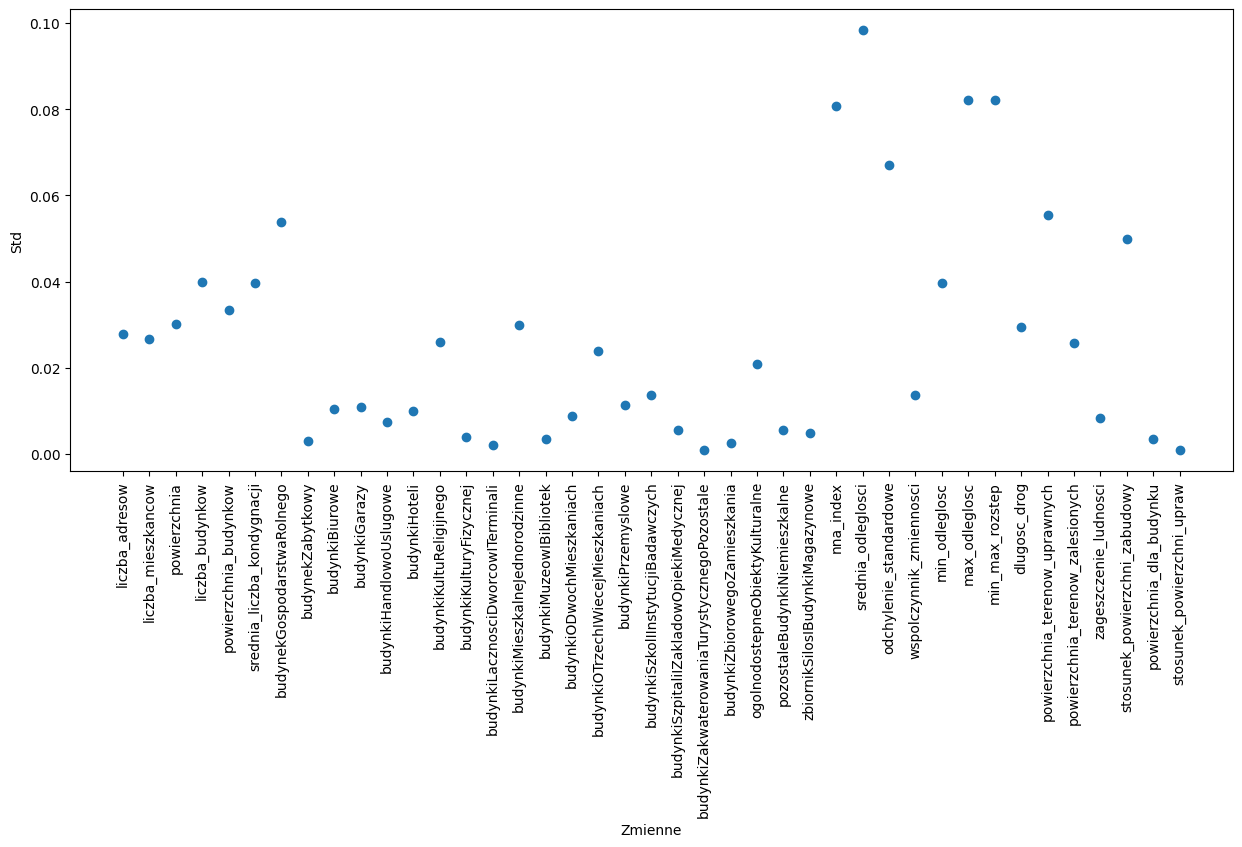

In [112]:
fig, ax = plt.subplots(figsize=(15, 6))
std = means_by_class.drop('rodzaj', axis=1).std()
ax.set_xlabel('Zmienne')
ax.set_ylabel('Std')
plt.scatter(std.index, std.values)
plt.xticks(std.index, rotation=90)
plt.show()

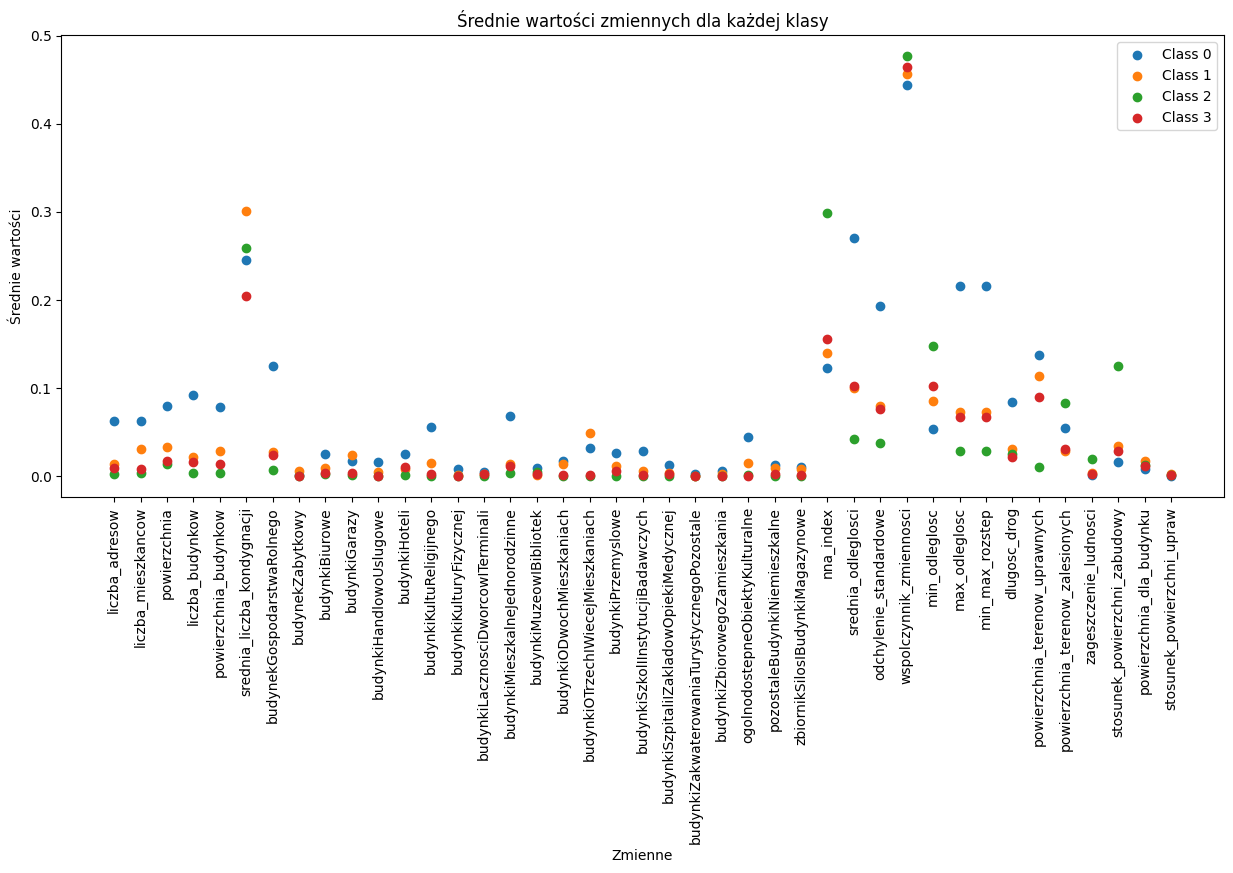

In [113]:
fig, ax = plt.subplots(figsize=(15, 6))

for class_label in means_by_class['rodzaj']:
    ax.scatter(means_by_class.drop('rodzaj', axis=1).columns, means_by_class.drop('rodzaj', axis=1).loc[class_label], label=f'Class {class_label}', marker='o')

ax.set_xlabel('Zmienne')
ax.set_ylabel('Średnie wartości')
ax.set_title('Średnie wartości zmiennych dla każdej klasy')
ax.legend()
plt.xticks(means_by_class.drop('rodzaj', axis=1).columns, rotation=90)
plt.show()

In [114]:
train_df, test_df = train_test_split(zbior_samodzielny, test_size=0.3, stratify=zbior_samodzielny['rodzaj'], random_state=42)

In [115]:
train_df['rodzaj'].value_counts()

rodzaj
0    1669
1     669
2      72
3      60
Name: count, dtype: int64

In [116]:
test_df['rodzaj'].value_counts()

rodzaj
0    716
1    286
2     31
3     26
Name: count, dtype: int64

In [117]:
x_train = train_df.drop('rodzaj', axis=1)
y_train = train_df['rodzaj']
x_test = test_df.drop('rodzaj', axis=1)
y_test = test_df['rodzaj']

In [118]:
smote = SMOTE(random_state=42, k_neighbors=3)
# smote = ADASYN(random_state=42)
under_sam = NearMiss(n_neighbors=10)

In [119]:
X_resampled, y_resampled = smote.fit_resample(x_train, y_train)
# X_resampled, y_resampled = under_sam.fit_resample(X_resampled, y_resampled)

In [120]:
X_resampled

,liczba_adresow,liczba_mieszkancow,powierzchnia,liczba_budynkow,powierzchnia_budynkow,srednia_liczba_kondygnacji,budynekGospodarstwaRolnego,budynekZabytkowy,budynkiBiurowe,budynkiGarazy,...,min_odleglosc,max_odleglosc,min_max_rozstep,dlugosc_drog,powierzchnia_terenow_uprawnych,powierzchnia_terenow_zalesionych,zageszczenie_ludnosci,stosunek_powierzchni_zabudowy,powierzchnia_dla_budynku,stosunek_powierzchni_upraw
0,0.218143,0.073932,0.037357,0.227642,0.102121,0.324598,0.108475,0.0,0.034483,0.0,...,0.037847,0.209008,0.209008,0.053921,0.023695,0.193849,0.002613,0.036686,0.000941,0.000069
1,0.045356,0.036329,0.043848,0.077548,0.056471,0.334988,0.111864,0.0,0.034483,0.0,...,0.059185,0.178533,0.178533,0.080413,0.204716,0.032381,0.001094,0.017311,0.003358,0.000508
2,0.052916,0.076801,0.051626,0.097561,0.088861,0.278107,0.176271,0.0,0.034483,0.0,...,0.041217,0.195041,0.195041,0.039149,0.341750,0.000243,0.001964,0.023097,0.003144,0.000720
3,0.008639,0.004780,0.043701,0.016260,0.019669,0.102564,0.032203,0.0,0.000000,0.0,...,0.102456,0.135845,0.135845,0.035978,0.355354,0.005892,0.000144,0.006095,0.015691,0.000884
4,0.009719,0.029955,0.050446,0.028143,0.029769,0.140468,0.045763,0.0,0.000000,0.0,...,0.053544,0.159414,0.159414,0.028393,0.060266,0.006281,0.000784,0.007954,0.010613,0.000130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6671,0.005934,0.006794,0.014710,0.010729,0.010107,0.171568,0.020898,0.0,0.000000,0.0,...,0.148679,0.057817,0.057817,0.016607,0.241828,0.000488,0.000605,0.009419,0.007985,0.001778
6672,0.002160,0.005295,0.077543,0.006698,0.006397,0.212486,0.014269,0.0,0.000000,0.0,...,0.117341,0.020968,0.020968,0.085058,0.101264,0.155478,0.000102,0.001257,0.063904,0.000138
6673,0.005400,0.006058,0.005465,0.007986,0.005888,0.232308,0.016458,0.0,0.000000,0.0,...,0.099246,0.038652,0.038652,0.015213,0.036259,0.006423,0.001412,0.015002,0.004158,0.000758
6674,0.005400,0.003782,0.005038,0.005621,0.004450,0.210762,0.011473,0.0,0.000000,0.0,...,0.105146,0.031216,0.031216,0.017117,0.050444,0.008906,0.000968,0.012632,0.005049,0.001102


In [121]:
y_resampled

0       0
1       0
2       0
3       0
4       1
       ..
6671    3
6672    3
6673    3
6674    3
6675    3
Name: rodzaj, Length: 6676, dtype: int64

In [122]:
# X_resampled = x_train
# y_resampled = y_train
rf_resampled = RandomForestClassifier(random_state=42, n_estimators=500)
# rf_resampled = GradientBoostingClassifier(random_state=42)
rf_resampled.fit(X_resampled, y_resampled.ravel())

RandomForestClassifier(n_estimators=500, random_state=42)

In [123]:
# X = zbior_samodzielny.drop('rodzaj', axis=1)
# y = zbior_samodzielny['rodzaj']
# pip = Pipeline([('smote', smote), ('model', rf_resampled)])
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# scoring = {'accuracy', 'balanced_accuracy'}
# results = cross_val_score(pip, X, y, cv=cv, scoring='balanced_accuracy')
# results

In [124]:
# results.mean()

In [125]:
# rf_resampled = svm.SVC(kernel='rbf', decision_function_shape='ovr', random_state=42)
# rf_resampled.fit(X_resampled, y_resampled.ravel())

In [126]:
y_pred = rf_resampled.predict(x_test)
reversefactor = dict(zip(range(5),mapowanie.keys()))
y_test = np.vectorize(reversefactor.get)(y_test)
y_pred = np.vectorize(reversefactor.get)(y_pred)
pd.crosstab(y_test, y_pred, rownames=['Actual Type'], colnames=['Predicted Type'])

Predicted Type,kolonia,osada,osada leśna,wieś
Actual Type,,,,
kolonia,3,13,2,8
osada,7,217,15,47
osada leśna,0,3,27,1
wieś,10,56,0,650


In [127]:
precision_per_class = precision_score(y_test, y_pred, labels=list(mapowanie.keys()), average=None)
recall_per_class = recall_score(y_test, y_pred, labels=list(mapowanie.keys()), average=None)
for cls, precision, recall in zip(mapowanie.keys(), precision_per_class, recall_per_class):
    print(f'Klasa {cls}: Precyzja={precision}, Czułość={recall}')

Klasa wieś: Precyzja=0.9206798866855525, Czułość=0.9078212290502793
Klasa osada: Precyzja=0.7508650519031141, Czułość=0.7587412587412588
Klasa osada leśna: Precyzja=0.6136363636363636, Czułość=0.8709677419354839
Klasa kolonia: Precyzja=0.15, Czułość=0.11538461538461539


In [128]:
accuracy_score(y_test, y_pred)

0.8470254957507082

In [129]:
balanced_accuracy_score(y_test, y_pred)

0.6632287112779094

In [94]:
for feature, importance in zip(x_train.columns, rf_resampled.feature_importances_):
    print(f'{feature}: {importance}')

liczba_adresow: 0.01636854832526561
liczba_mieszkancow: 0.08244789078440633
powierzchnia: 0.014058830998526074
liczba_budynkow: 0.00662266286804902
powierzchnia_budynkow: 0.02995673858522169
srednia_liczba_kondygnacji: 0.04474440228075557
budynekGospodarstwaRolnego: 0.24227876622150346
budynekZabytkowy: 0.00028889350950333744
budynkiBiurowe: 0.003982898264903
budynkiGarazy: 0.006470986123029705
budynkiHandlowoUslugowe: 0.0025734966622871142
budynkiHoteli: 0.0004176992100591497
budynkiKultuReligijnego: 0.000369526265548637
budynkiKulturyFizycznej: 1.8264750166824938e-06
budynkiLacznosciDworcowITerminali: 0.0023441885504435125
budynkiMieszkalneJednorodzinne: 0.014466911973625428
budynkiMuzeowIBibliotek: 0.005363748335539016
budynkiODwochMieszkaniach: 0.0013999116169220878
budynkiOTrzechIWiecejMieszkaniach: 0.07527931739287548
budynkiPrzemyslowe: 0.00679573773657068
budynkiSzkolIInstytucjiBadawczych: 4.62483291618796e-05
budynkiSzpitaliIZakladowOpiekiMedycznej: 0.0006828477640302224
budyn